In [1]:
#to call all the time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Activation
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping
import json
import glob
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from tensorflow.keras import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import BatchNormalization



from google.colab import drive
# For mouting Google drive to be used for data
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
def convert_data(start, stop, folder_name_json, file_name_text):
  '''
  start- starting of the video number to be added to text file
  stop - last video number to be added
  folder_name_json - path of json files for videos
  file_name_text -  path of text file where the key-point values are to stored
  '''
  with open(file_name_text,"w") as x:
    for i in range(start, stop+1):
          json_files = glob.glob(folder_name_json + '/'+ str(i)+"/*")
          j=0
          for jfile in json_files:
            if j< 140:
              j = j + 1
              with open(jfile) as f:
                  data = json.load(f)
                  if data['people']:
                      kp= data['people'][0]['pose_keypoints_2d']
                      kp = [ str(v) for v in kp]
                      r =','.join(kp)
                      x.write('{}\n'.format(r))

In [3]:
def read_data(file_name):
  '''
  INPUT: file_name = text file which is to be converted ito array
  OUTPUT: data = return the array
  '''
  number = [i for i in range(0, 74) if (i+1) % 3 != 0]
  data = np.loadtxt(file_name, usecols=number, delimiter = ",")
  return data

In [4]:
def generate_label():
  '''
  OUTPUT: Ytrain - labels for training data
          Yval - labels for validation data
  '''
  y = np.zeros(60)
  y = np.append(y, np.ones(80))        #1
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #2
  y = np.append(y, np.zeros(80))
  y = np.append(y, np.ones(60))        #3
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #4
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #5
  y = np.append(y, np.zeros(60))     
  y = np.append(y, np.ones(80))        #6
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #7
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #8
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #9
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #10
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #11
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #12
  y = np.append(y, np.zeros(2520))     #30
  y = np.append(y, np.zeros(90))
  y = np.append(y, np.ones(50))        #31
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #32
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #33
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #34
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #35
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #36
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #37
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #38
  y = np.append(y, np.zeros(80))
  y = np.append(y, np.ones(60))        #39
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #40
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #41
  y = np.append(y, np.ones(700))       #46
  y = np.append(y, np.zeros(420))      #49   
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #50
  y = np.append(y, np.zeros(420))      #53
  y = np.append(y, np.ones(840))       #59
  y = np.append(y, np.zeros(3500))     #84
  y = np.append(y, np.ones(840))       #90
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #91
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #92
  y = np.append(y, np.zeros(70))
  y = np.append(y, np.ones(70))        #93
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #94
  y = np.append(y, np.zeros(40)) 
  y = np.append(y, np.ones(100))       #95
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #96
  y = np.append(y, np.zeros(50)) 
  y = np.append(y, np.ones(90))        #97
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #98
  y = np.append(y, np.zeros(110))
  y = np.append(y, np.ones(30))        #99
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #100
  y = np.append(y, np.zeros(1260))       #109
  y = np.append(y, np.ones(1260))       #118
  y = np.append(y, np.zeros(2800))       #138
  y = np.append(y, np.ones(3080))       #160

  Ytrain = np.concatenate((y[:9800], y[16520:22400]), axis=0)
  Yval = y[9800:16520]

  return Ytrain,Yval

In [5]:
#GENERATING TRAINING AND VALIDATION ARRAYS:

#FOR X-file:
file_name_train = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_train.txt"   ##CHANGE accordingly while increasing dataset##
Xtrain = read_data(file_name_train) 
file_name_train1 = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_train_new.txt"   ##CHANGE accordingly while increasing dataset##
Xtrain_new = read_data(file_name_train1)
Xtrain = np.concatenate((Xtrain, Xtrain_new), axis=0)
Xtrain = Xtrain.reshape(1568,10,50) 

file_name_val = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_val.txt"   ##CHANGE accordingly while increasing dataset##
Xval = read_data(file_name_val) 
file_name_val1 = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_Val_new.txt"   ##CHANGE accordingly while increasing dataset##
Xval_new = read_data(file_name_val1)
Xval = np.concatenate((Xval, Xval_new), axis=0)
Xval = Xval.reshape(672,10,50)

#FOR Y-file:
Ytrain,Yval = generate_label()
Ytrain = Ytrain.reshape(1568,10,1)
Yval = Yval.reshape(672,10,1)

print('X-training = ', Xtrain.shape)
print('X-validation = ',Xval.shape)
print('Y-training = ', Ytrain.shape)
print('Y-validation = ',Yval.shape)

X-training =  (1568, 10, 50)
X-validation =  (672, 10, 50)
Y-training =  (1568, 10, 1)
Y-validation =  (672, 10, 1)


In [6]:
# Setting up early stopping criteria
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
path1 = '/content/drive/My Drive/CSCE636/Model/Submission10_1/model_submit10_model1_epochs.{epoch:02d}-{val_accuracy:.2f}.hdf5'
path2 = '/content/drive/My Drive/CSCE636/Model/Submission10_2/model_submit10_model2_epochs.{epoch:02d}-{val_accuracy:.2f}.hdf5'
path3 = '/content/drive/My Drive/CSCE636/Model/Submission10_3/model_submit10_model3_epochs.{epoch:02d}-{val_accuracy:.2f}.hdf5'
path4 = '/content/drive/My Drive/CSCE636/Model/Submission10_4/model_submit10_model4_epochs.{epoch:02d}-{val_accuracy:.2f}.hdf5'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save1 = ModelCheckpoint(path1, save_best_only=True, monitor='val_accuracy', mode='max')
mcp_save2 = ModelCheckpoint(path2, save_best_only=True, monitor='val_accuracy', mode='max')
mcp_save3 = ModelCheckpoint(path3, save_best_only=True, monitor='val_accuracy', mode='max')
mcp_save4 = ModelCheckpoint(path4, save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='min')

checkpoint1 = [earlyStopping, mcp_save1, reduce_lr_loss]
checkpoint2 = [earlyStopping, mcp_save2, reduce_lr_loss]
checkpoint3 = [earlyStopping, mcp_save3, reduce_lr_loss]
checkpoint4 = [earlyStopping, mcp_save4, reduce_lr_loss]

In [7]:
  ###DATA AUGMENTATION###
A = np.random.normal(0.0, 10.0, (1568,10,50) )
Xtrain_noise = np.add(Xtrain , A)
Xtrain = np.concatenate((Xtrain,Xtrain_noise), axis=0)
print('X-training shape after adding noise = ' , Xtrain.shape)

Ytrain = np.concatenate((Ytrain,Ytrain), axis=0)
print('Y-training shape after adding noise = ' , Ytrain.shape)

X-training shape after adding noise =  (3136, 10, 50)
Y-training shape after adding noise =  (3136, 10, 1)


In [8]:
print('X-validation shape after adding noise = ' , Xval.shape)
print('Y-validation shape after adding noise = ' , Yval.shape)

X-validation shape after adding noise =  (672, 10, 50)
Y-validation shape after adding noise =  (672, 10, 1)


In [9]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model1.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model1.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model1.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model1.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model1.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model1.add(tf.keras.layers.LSTM(500, return_sequences=True))
model1.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
model1.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

adam = tf.keras.optimizers.Adam(lr = 0.0001)
model1.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 500)           1102000   
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 500)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 500)           2002000   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 500)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 500)           2002000   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 500)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 500)           2

In [10]:
#Main model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model2.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True)))
model2.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model2.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True)))
model2.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model2.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model2.add(tf.keras.layers.LSTM(500, return_sequences=True))
model2.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
model2.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

adam = tf.keras.optimizers.Adam(lr = 0.0001)
model2.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 500)           1102000   
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 500)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 1000)          4004000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 500)           3002000   
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 500)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 1000)          4004000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 10, 500)          

In [11]:
#Main model
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model3.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model3.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model3.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model3.add(tf.keras.layers.Conv1D(500, kernel_size=2, strides=1,activation='relu',input_shape=(10,50), padding='same'))
model3.add(BatchNormalization())
model3.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model3.add(BatchNormalization())
model3.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model3.add(tf.keras.layers.LSTM(500, return_sequences=True))
model3.add(BatchNormalization())
model3.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
model3.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

adam = tf.keras.optimizers.Adam(lr = 0.0001)
model3.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 500)           1102000   
_________________________________________________________________
time_distributed_10 (TimeDis (None, 10, 500)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 500)           2002000   
_________________________________________________________________
time_distributed_11 (TimeDis (None, 10, 500)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 500)           500500    
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 500)           2000      
_________________________________________________________________
lstm_12 (LSTM)               (None, 10, 500)          

In [12]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model4.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model4.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model4.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model4.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model4.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model4.add(tf.keras.layers.Conv1D(500, kernel_size=2, strides=1,activation='relu',input_shape=(10,50), padding='same'))
model4.add(BatchNormalization())
model4.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model4.add(tf.keras.layers.LSTM(500, input_shape=(10,50), return_sequences=True))
model4.add(BatchNormalization())
model4.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model4.add(tf.keras.layers.LSTM(500, return_sequences=True))
model4.add(tf.keras.layers.LSTM(500, return_sequences=True))
model4.add(BatchNormalization())
model4.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
model4.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

adam = tf.keras.optimizers.Adam(lr = 0.0001)
model4.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 10, 500)           1102000   
_________________________________________________________________
lstm_15 (LSTM)               (None, 10, 500)           2002000   
_________________________________________________________________
time_distributed_15 (TimeDis (None, 10, 500)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 10, 500)           2002000   
_________________________________________________________________
lstm_17 (LSTM)               (None, 10, 500)           2002000   
_________________________________________________________________
time_distributed_16 (TimeDis (None, 10, 500)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 500)          

In [13]:
from matplotlib import pyplot
history1 = model1.fit(Xtrain, Ytrain, batch_size =100, epochs = 500, verbose = 1, validation_data=(Xval, Yval),callbacks=checkpoint1)

Epoch 1/500
32/32 [==============================] - 22s 58ms/step - loss: 1.2340 - accuracy: 0.6398 - val_loss: 1.1255 - val_accuracy: 0.7552
Epoch 2/500
32/32 [==============================] - 0s 14ms/step - loss: 1.0230 - accuracy: 0.8132 - val_loss: 0.9679 - val_accuracy: 0.8083
Epoch 3/500
32/32 [==============================] - 0s 14ms/step - loss: 0.9249 - accuracy: 0.8372 - val_loss: 0.8943 - val_accuracy: 0.8412
Epoch 4/500
32/32 [==============================] - 0s 14ms/step - loss: 0.8434 - accuracy: 0.8689 - val_loss: 0.8248 - val_accuracy: 0.8493
Epoch 5/500
32/32 [==============================] - 0s 14ms/step - loss: 0.7575 - accuracy: 0.8909 - val_loss: 0.7795 - val_accuracy: 0.8750
Epoch 6/500
32/32 [==============================] - 0s 14ms/step - loss: 0.7162 - accuracy: 0.8894 - val_loss: 0.7610 - val_accuracy: 0.8661
Epoch 7/500
32/32 [==============================] - 0s 14ms/step - loss: 0.6674 - accuracy: 0.8919 - val_loss: 0.7100 - val_accuracy: 0.8699
Epoch

In [14]:
history2 = model2.fit(Xtrain, Ytrain, batch_size =100, epochs = 500, verbose = 1, validation_data=(Xval, Yval),callbacks=checkpoint2)

Epoch 1/500
32/32 [==============================] - 12s 96ms/step - loss: 1.2028 - accuracy: 0.6634 - val_loss: 1.0146 - val_accuracy: 0.8006
Epoch 2/500
32/32 [==============================] - 1s 28ms/step - loss: 0.9404 - accuracy: 0.8451 - val_loss: 0.9030 - val_accuracy: 0.8393
Epoch 3/500
32/32 [==============================] - 1s 27ms/step - loss: 0.8239 - accuracy: 0.8780 - val_loss: 0.7860 - val_accuracy: 0.8780
Epoch 4/500
32/32 [==============================] - 1s 27ms/step - loss: 0.7399 - accuracy: 0.8925 - val_loss: 0.7217 - val_accuracy: 0.8876
Epoch 5/500
32/32 [==============================] - 1s 28ms/step - loss: 0.6945 - accuracy: 0.8954 - val_loss: 0.7521 - val_accuracy: 0.8562
Epoch 6/500
32/32 [==============================] - 1s 28ms/step - loss: 0.6285 - accuracy: 0.9098 - val_loss: 0.6713 - val_accuracy: 0.8689
Epoch 7/500
32/32 [==============================] - 1s 28ms/step - loss: 0.5967 - accuracy: 0.9127 - val_loss: 0.6427 - val_accuracy: 0.8682
Epoch

In [15]:
history3 = model3.fit(Xtrain, Ytrain, batch_size =100, epochs = 500, verbose = 1, validation_data=(Xval, Yval),callbacks=checkpoint3)

Epoch 1/500
32/32 [==============================] - 7s 56ms/step - loss: 1.1418 - accuracy: 0.7265 - val_loss: 1.2512 - val_accuracy: 0.6826
Epoch 2/500
32/32 [==============================] - 1s 16ms/step - loss: 0.8910 - accuracy: 0.8636 - val_loss: 1.2083 - val_accuracy: 0.7542
Epoch 3/500
32/32 [==============================] - 1s 16ms/step - loss: 0.7942 - accuracy: 0.8947 - val_loss: 1.1427 - val_accuracy: 0.7984
Epoch 4/500
32/32 [==============================] - 1s 16ms/step - loss: 0.7603 - accuracy: 0.9015 - val_loss: 1.0666 - val_accuracy: 0.8426
Epoch 5/500
32/32 [==============================] - 1s 16ms/step - loss: 0.7115 - accuracy: 0.9135 - val_loss: 0.9782 - val_accuracy: 0.8347
Epoch 6/500
32/32 [==============================] - 1s 16ms/step - loss: 0.6696 - accuracy: 0.9194 - val_loss: 0.9019 - val_accuracy: 0.8470
Epoch 7/500
32/32 [==============================] - 1s 16ms/step - loss: 0.6328 - accuracy: 0.9247 - val_loss: 0.8180 - val_accuracy: 0.8641
Epoch 

In [16]:
history4 = model4.fit(Xtrain, Ytrain, batch_size =100, epochs = 500, verbose = 1, validation_data=(Xval, Yval),callbacks=checkpoint4)

Epoch 1/500
32/32 [==============================] - 12s 96ms/step - loss: 1.1551 - accuracy: 0.7083 - val_loss: 1.2724 - val_accuracy: 0.5524
Epoch 2/500
32/32 [==============================] - 1s 28ms/step - loss: 0.9304 - accuracy: 0.8329 - val_loss: 1.2464 - val_accuracy: 0.5644
Epoch 3/500
32/32 [==============================] - 1s 29ms/step - loss: 0.8635 - accuracy: 0.8624 - val_loss: 1.2208 - val_accuracy: 0.5985
Epoch 4/500
32/32 [==============================] - 1s 29ms/step - loss: 0.8182 - accuracy: 0.8755 - val_loss: 1.1941 - val_accuracy: 0.6539
Epoch 5/500
32/32 [==============================] - 1s 30ms/step - loss: 0.7678 - accuracy: 0.8887 - val_loss: 1.1633 - val_accuracy: 0.6329
Epoch 6/500
32/32 [==============================] - 1s 29ms/step - loss: 0.7358 - accuracy: 0.8978 - val_loss: 1.1274 - val_accuracy: 0.7185
Epoch 7/500
32/32 [==============================] - 1s 30ms/step - loss: 0.6879 - accuracy: 0.9083 - val_loss: 1.0935 - val_accuracy: 0.7454
Epoch

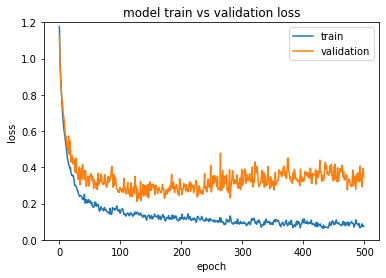

In [17]:
import matplotlib.pyplot as plt

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.ylim([0,1.2])
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

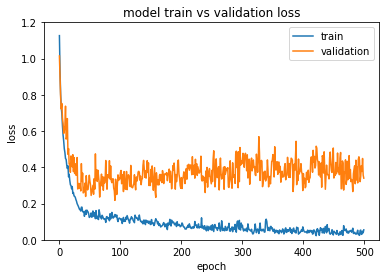

In [18]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.ylim([0,1.2])
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

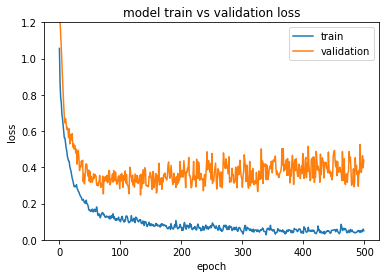

In [19]:
import matplotlib.pyplot as plt

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.ylim([0,1.2])
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

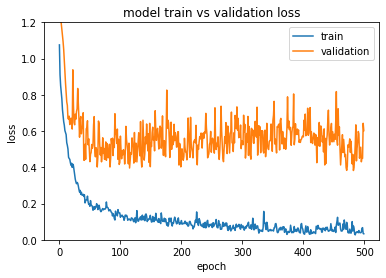

In [20]:
import matplotlib.pyplot as plt

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.ylim([0,1.2])
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [21]:
pred1 = model1.predict(Xval)
pred2 = model2.predict(Xval)
pred3 = model3.predict(Xval)
pred4 = model4.predict(Xval)

In [22]:
predicted_class1 = pred1.flatten()
predicted_class2 = pred2.flatten()
predicted_class3 = pred3.flatten()
predicted_class4 = pred4.flatten()

In [23]:
total_predicted = (0.25 * predicted_class1) + (0.25 * predicted_class2) + (0.25 * predicted_class3) + (0.25 * predicted_class4)

In [24]:
total_predicted[total_predicted >= 0.5] = 1
total_predicted[total_predicted < 0.5] = 0

In [25]:
predicted_class1[predicted_class1 >= 0.5] = 1
predicted_class1[predicted_class1 < 0.5] = 0

predicted_class2[predicted_class2 >= 0.5] = 1
predicted_class2[predicted_class2 < 0.5] = 0

predicted_class3[predicted_class3 >= 0.5] = 1
predicted_class3[predicted_class3 < 0.5] = 0

predicted_class4[predicted_class4 >= 0.5] = 1
predicted_class4[predicted_class4 < 0.5] = 0

true = Yval.flatten()

In [26]:
import sklearn
from sklearn.metrics import accuracy_score
print("Model 1 prediction accuracy:", sklearn.metrics.accuracy_score(predicted_class1, true))
print("Model 2 prediction accuracy:", sklearn.metrics.accuracy_score(predicted_class2, true))
print("Model 3 prediction accuracy:", sklearn.metrics.accuracy_score(predicted_class3, true))
print("Model 4 prediction accuracy:", sklearn.metrics.accuracy_score(predicted_class4, true))
print("Ensemble prediction accuracy:", sklearn.metrics.accuracy_score(total_predicted, true))

Model 1 prediction accuracy: 0.9095238095238095
Model 2 prediction accuracy: 0.8986607142857143
Model 3 prediction accuracy: 0.8787202380952381
Model 4 prediction accuracy: 0.8671130952380952
Ensemble prediction accuracy: 0.9151785714285714
